In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'about_product', 'user_id', 'user_name', 'review_id',
       'review_title', 'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.duplicated(subset=['product_name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1465, dtype: bool

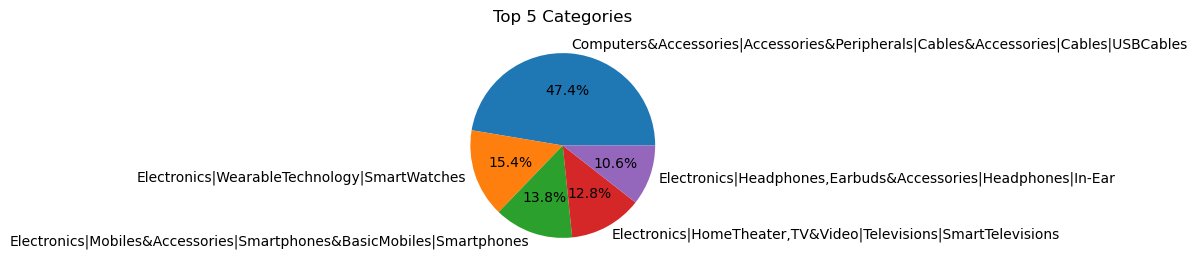

In [17]:
top5 = df['category'].value_counts().head(5)
plt.figure(figsize=(3,3))
plt.pie(top5,labels=top5.index,autopct='%1.1f%%')
plt.title('Top 5 Categories')
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_21896\1880904705.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Discounted Price', 'Actual Price'])


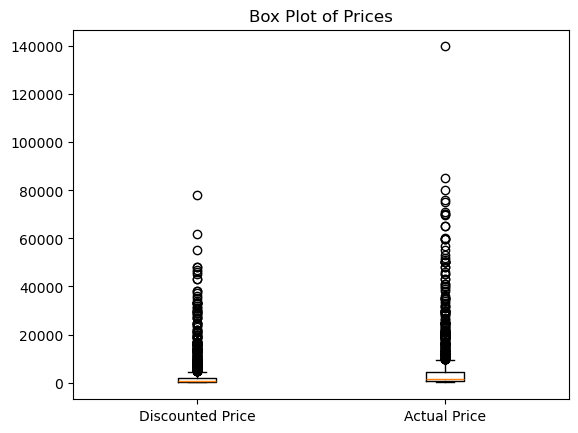

In [39]:
data = [df['discounted_price'], df['actual_price']]
plt.boxplot(data, labels=['Discounted Price', 'Actual Price'])
plt.title('Box Plot of Prices')
plt.show()

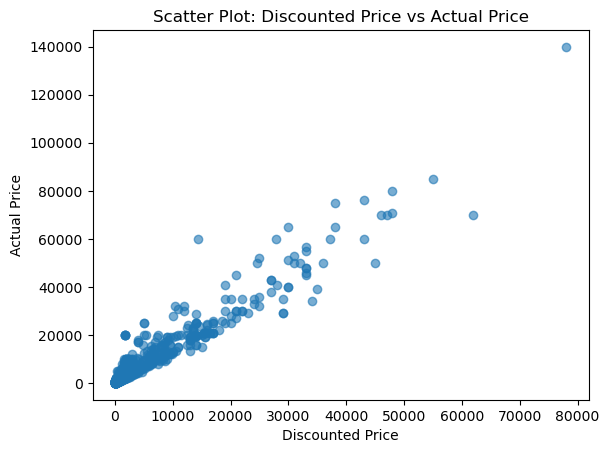

In [47]:
import matplotlib.pyplot as plt

x = df['discounted_price'].values
y = df['actual_price'].values
plt.scatter(x, y, alpha=0.6)

plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.title('Scatter Plot: Discounted Price vs Actual Price')

plt.show()



In [49]:
top10_discounted = df.sort_values(by='discount_percentage', ascending=False).head(10)
top10_discounted[['product_name','category', 'discount_percentage']]


,product_name,category,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,0.94
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,0.91
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,0.91
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,0.91
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,0.91
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,0.91
1026,beatXP Kitchen Scale Multipurpose Portable Ele...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.90
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,Electronics|Mobiles&Accessories|MobileAccessor...,0.90
542,Sounce Protective Case Cover Compatible Boat X...,Electronics|Mobiles&Accessories|MobileAccessor...,0.90
407,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,0.90


In [50]:
top10_least_discounted = df.sort_values(by='discount_percentage', ascending=True).head(10)
top10_least_discounted[['product_name','category', 'discount_percentage']]

,product_name,category,discount_percentage
710,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,0.0
837,ENVIE® (AA10004PLNi-CD) AA Rechargeable Batter...,Electronics|GeneralPurposeBatteries&BatteryCha...,0.0
33,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,0.0
965,"Panasonic Eneloop BQ-CC55N Advanced, Smart and...",Electronics|GeneralPurposeBatteries&BatteryCha...,0.0
1128,HUL Pureit Germkill kit for Classic 23 L water...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,0.0
739,Casio MJ-12D 150 Steps Check and Correct Deskt...,OfficeProducts|OfficeElectronics|Calculators|B...,0.0
1129,HUL Pureit Germkill kit for Classic 23 L water...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,0.0
952,Casio MJ-120D 150 Steps Check and Correct Desk...,OfficeProducts|OfficeElectronics|Calculators|F...,0.0
950,Classmate Pulse 1 Subject Notebook - 240mm x 1...,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
339,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Electronics|Mobiles&Accessories|Smartphones&Ba...,0.0


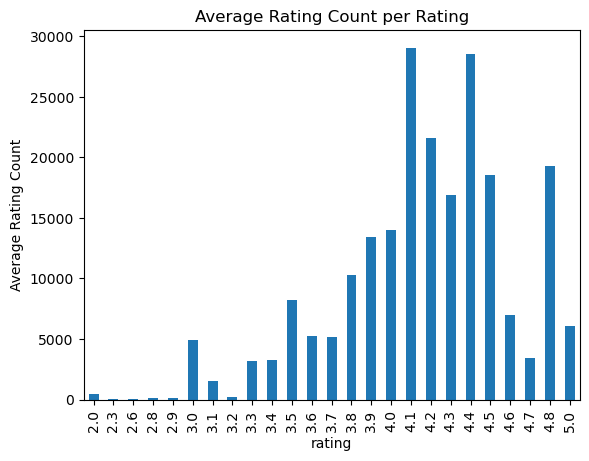

In [53]:
avg_counts = df.groupby('rating')['rating_count'].mean()
avg_counts.plot(kind='bar')
plt.ylabel('Average Rating Count')
plt.title('Average Rating Count per Rating')
plt.show()


In [54]:
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
corr_matrix = df[num_cols].corr()
print(corr_matrix)


                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.118981      0.120855            -0.145521   
rating_count                -0.027258     -0.036133             0.011676   

                       rating  rating_count  
discounted_price     0.118981     -0.027258  
actual_price         0.120855     -0.036133  
discount_percentage -0.145521      0.011676  
rating               1.000000      0.101609  
rating_count         0.101609      1.000000  


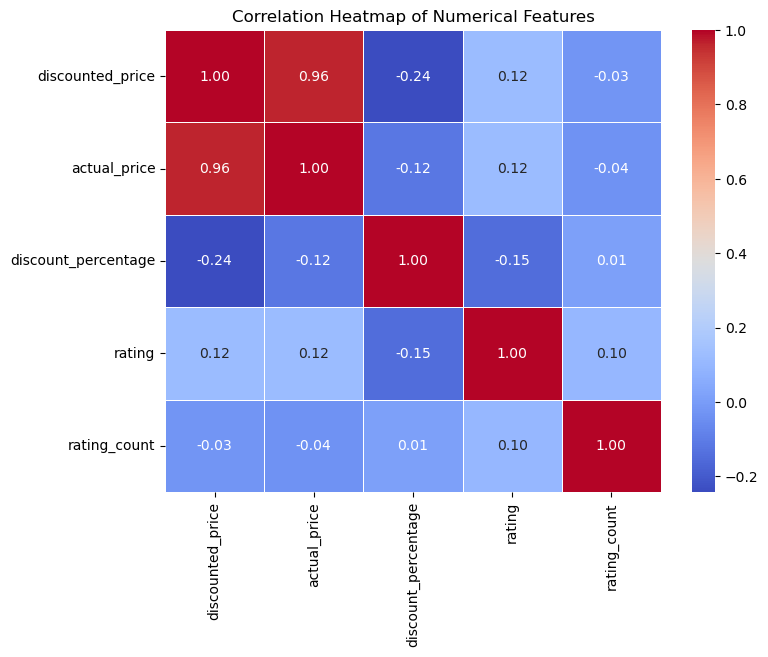

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()